In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [2]:
class LoopTrajectory:
    def __init__(self, viapoints, t_tot):
        """
        Initialize with an array of viapoints. Viapoints should be a Nx2 array.
        """
        self.viapoints = np.array(viapoints)
        # if the last and first viapoints does not match, append 
        if not np.allclose(self.viapoints[0], self.viapoints[-1]):
            self.viapoints = np.vstack([self.viapoints, self.viapoints[0]])
        self.t_tot = t_tot
        self.compute_spline(t_tot)
    
    def compute_spline(self, t_tot):
        """
        Compute cubic spline for the given viapoints.
        """
        t = np.linspace(0, t_tot, len(self.viapoints))
        self.spline_x = CubicSpline(t, self.viapoints[:, 0], bc_type='periodic')
        self.spline_y = CubicSpline(t, self.viapoints[:, 1], bc_type='periodic')
    
    def eval_trajectory(self, t):
        """
        Compute x, y, omega, x_dot, y_dot, omega_dot as a function of t.
        """
        x = self.spline_x(t)
        y = self.spline_y(t)
        x_dot = self.spline_x(t, 1)
        y_dot = self.spline_y(t, 1)

        theta = np.arctan2(y_dot.item(0), x_dot.item(0))

        w_R_b = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
        
        b_vel_xy = (w_R_b.T).dot(np.array([x_dot,y_dot]))
        # v = np.linalg.norm(b_vel_xy)
        v = b_vel_xy[0]

        x_ddot = self.spline_x(t, 2)
        y_ddot = self.spline_y(t, 2)

        omega = (x_dot * y_ddot - y_dot * x_ddot) / (x_dot**2 + y_dot**2)

        b_vel_dot_xy = (w_R_b.T).dot(np.array([x_ddot,y_ddot]))
        # v_dot = np.linalg.norm(b_vel_dot_xy)
        v_dot = b_vel_dot_xy[0]

        #TODO
        omega_dot = 0.

        return x, y, theta, v, omega, v_dot, omega_dot
    
    def plot_trajectory(self):
        """
        Plot the trajectory for visualization.
        """
        t = np.linspace(0, self.t_tot, 100)
        x, y, _ , _ , _, _, _ = self.eval_trajectory(t)
        
        plt.figure()
        plt.plot(x, y, label='Trajectory')
        plt.plot(self.viapoints[:, 0], self.viapoints[:, 1], 'ro', label='Points')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Closed Loop Trajectory')
        plt.grid()
        plt.show()

In [3]:
def generate_circle_viapoints(radius, num_points):
    # Generate angles evenly spaced around the circle
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    
    # Calculate x and y coordinates for each angle
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    
    # Combine x and y into a single array of shape (num_points, 2)
    viapoints = np.column_stack((x_coords, y_coords))
    
    return viapoints

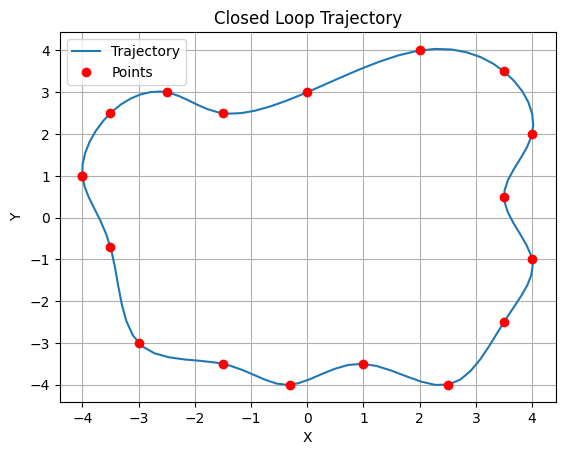

In [100]:
# Example usage:
viapoints = np.array([[-4.,  1],
                      [-3.5,  -0.7],
                      [-3,  -3],
                      [-1.5, -3.5],
                      [-0.3, -4.],
                      [1, -3.5],
                      [2.5, -4],
                      [3.5, -2.5],
                      [4, -1.],
                      [3.5,  0.5],
                      [4,  2],
                      [3.5,  3.5],
                      [2.,  4],
                      [0.,  3.],
                      [-1.5,  2.5],
                      [-2.5,  3.],
                      [-3.5, 2.5]])

# viapoints = generate_circle_viapoints(3, 20)


t_tot = 60
trajectory = LoopTrajectory(viapoints, t_tot)
trajectory.plot_trajectory()

In [68]:

# Compute trajectory values at specific time
t_values = np.linspace(0, t_tot, 10)
for t in t_values:
    x, y, theta, v, omega, v_dot, omega_dot = trajectory.eval_trajectory(t)
    print(f"t={t:.2f}: x={x:.2f}, y={y:.2f}, theta={theta:.2f}, v={v:.2f}, omega={omega:.2f}, v_dot={v_dot:.2f}, omega_dot={omega_dot:.2f}")


t=0.00: x=-4.00, y=0.50, theta=-1.50, v=0.87, omega=0.55, v_dot=-0.52, omega_dot=0.00
t=5.56: x=-3.50, y=-2.00, theta=-1.63, v=0.52, omega=0.53, v_dot=-0.04, omega_dot=0.00
t=11.11: x=-1.50, y=-3.00, theta=-0.52, v=0.52, omega=-0.76, v_dot=0.17, omega_dot=0.00
t=16.67: x=1.00, y=-3.00, theta=0.33, v=0.42, omega=-1.18, v_dot=-0.28, omega_dot=0.00
t=22.22: x=3.00, y=-2.50, theta=1.47, v=0.54, omega=0.71, v_dot=-0.07, omega_dot=0.00
t=27.78: x=3.00, y=0.50, theta=0.78, v=0.56, omega=-0.36, v_dot=-0.06, omega_dot=0.00
t=33.33: x=3.50, y=3.00, theta=2.94, v=0.48, omega=1.37, v_dot=0.04, omega_dot=0.00
t=38.89: x=1.00, y=4.00, theta=2.40, v=0.61, omega=0.78, v_dot=-0.18, omega_dot=0.00
t=44.44: x=-1.50, y=2.00, theta=2.98, v=0.42, omega=-1.89, v_dot=0.28, omega_dot=0.00
t=50.00: x=-4.00, y=0.50, theta=-1.50, v=0.87, omega=0.55, v_dot=-0.52, omega_dot=0.00
